<a href="https://colab.research.google.com/github/yee23456/AI_problem_analysis/blob/main/%E4%BD%9C%E6%A5%AD%E4%BA%8C_%E6%B2%88%E7%9D%BF%E6%9C%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=(12,8)

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

--2022-04-13 07:50:23--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.204.113, 74.125.204.139, 74.125.204.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.204.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/q0lg0gsj22fgrlb28h3bmutaevosm0ho/1649836200000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-04-13 07:50:23--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/q0lg0gsj22fgrlb28h3bmutaevosm0ho/1649836200000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.125.132, 2404:6800:4008:c01::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|108.177.125.1

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/大學/大數據資料/高齡獨居化計畫.csv')
df_towm_id = pd.read_excel('/content/drive/MyDrive/大學/大數據資料/鄉鎮市區.xlsx')
df_towm_id = df_towm_id.drop(['鄉鎮市區代碼'],axis = 1)
data = data.merge(df_towm_id, left_on=('addr_city_cd'), right_on=('戶籍鄉鎮市區'))

city_A_no = pd.DataFrame(data.groupby('縣市').sum()['Total_older'] / data.groupby('縣市').sum()['total_city_people'],columns=['older_precent'])
city_A_no['older_lonely_precent'] = data.groupby('縣市').sum()['total_old_and_lonely'] / data.groupby('縣市').sum()['total_city_people']
data = data.merge(city_A_no, left_on=('縣市'), right_on=('縣市'))

town_A_no = pd.DataFrame(data.groupby('TOWNNAME').sum()['Total_older'] / data.groupby('TOWNNAME').sum()['total_city_people'],columns=['T_older_precent'])
town_A_no['T_older_lonely_precent'] = data.groupby('TOWNNAME').sum()['total_old_and_lonely'] / data.groupby('TOWNNAME').sum()['total_city_people']
data = data.merge(town_A_no, left_on=('TOWNNAME'), right_on=('TOWNNAME'))

df = pd.read_excel('/content/drive/MyDrive/大學/大數據資料/經濟指標資料1.xlsx')
df = df.drop(['Unnamed: 0'],axis = 1)
data = data.merge(df, left_on=('TOWNNAME'), right_on=('TOWNNAME'))

dx = pd.read_excel('/content/drive/MyDrive/大學/大數據資料/經濟指標資料2.xlsx')
dx = dx.drop(['Unnamed: 0','TOWNID','TOWNCODE','COUNTYNAME','TOWNENG','COUNTYID','COUNTYCODE'],axis = 1)
data = pd.merge( data, dx , on='TOWNNAME')

data['city_town'] = data['縣市'] + '\n' + data['TOWNNAME']

#第一題

# 新增區段

In [ ]:
city_data_older = data.groupby('COUNTYNAME').mean().sort_values('older_precent')[::-1]
city_list_older = city_data_older.index.tolist()
city_older = pd.DataFrame(city_data_older,city_list_older)
city_older['商店趴數'] = data.groupby('縣市').sum()['商店總數'] / data.groupby('縣市').sum()['total_city_people']
# city_older[['older_precent','單價元坪','商店趴數','綜所稅總額平均數(千元)']]

In [ ]:
town_data_older = data.groupby('city_town').mean().sort_values('T_older_precent')[::-1]
town_list_older = town_data_older.index.tolist()
town_older = pd.DataFrame(town_data_older,town_list_older)
# town_older['商店趴數'] = data.groupby('city_town').sum()['商店總數'] / data.groupby('city_town').sum()['total_city_people']

store = ['診所數量','金融機構','超商超市市場','餐飲','加油站數量']

def store_town(name):
  town_older[name] = data.groupby('city_town').sum()[name] / data.groupby('city_town').sum()['total_city_people']

for i in store:
  store_town(i)

town_older[store]

,診所數量,金融機構,超商超市市場,餐飲,加油站數量
新北市\n平溪區,0.00065,0.00022,0.00065,0.01198,0.00022
高雄市\n田寮區,0.00028,0.00028,0.00014,0.00408,0.00014
臺南市\n左鎮區,0.00064,0.00021,0.00064,0.00127,0.00042
苗栗縣\n獅潭鄉,0.00047,0.00024,0.00024,0.00753,0.00024
臺南市\n龍崎區,0.00025,0.00000,0.00051,0.00178,0.00051
...,...,...,...,...,...
臺東縣\n海端鄉,0.00024,0.00024,0.00024,0.00607,0.00024
高雄市\n那瑪夏區,0.00063,0.00032,0.00000,0.00317,0.00032
新竹縣\n竹北市,0.00096,0.00029,0.00076,0.00689,0.00009
臺東縣\n蘭嶼鄉,0.00019,0.00019,0.00039,0.01650,0.00019


In [ ]:
# def colors(data_len):
#   colors = cm.RdYlGn(np.linspace(0,1,len(data_len)))
#   return colors

def first_6(data_name,n):
  axes = data_name[n][:6].plot.bar(rot = 0 ,color = 'lightsalmon')
  return Drow_P(axes)

def city_6(data_name,n,p):
  axes = data_name[n].iloc[p].plot.bar(rot = 0 ,color = 'lightsalmon')
  return Drow_P(axes)
  
def Drow_P(x):
  for label in x.get_xticklabels():
    label.set_fontproperties(myfont)
  plt.legend(prop=myfont)

## 商店

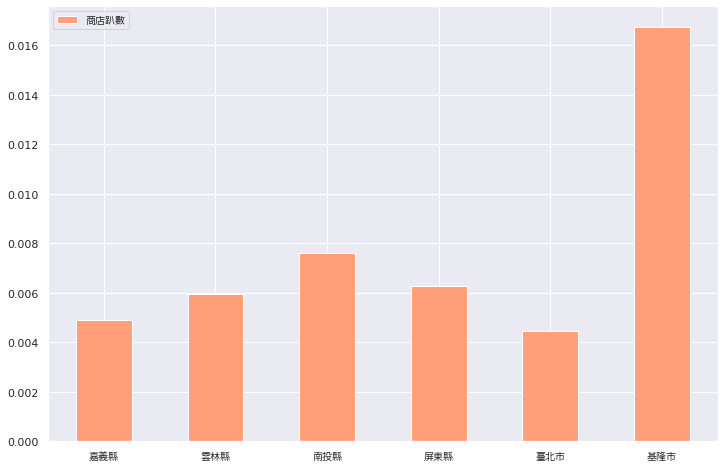

In [ ]:
first_6(city_older,'商店趴數')

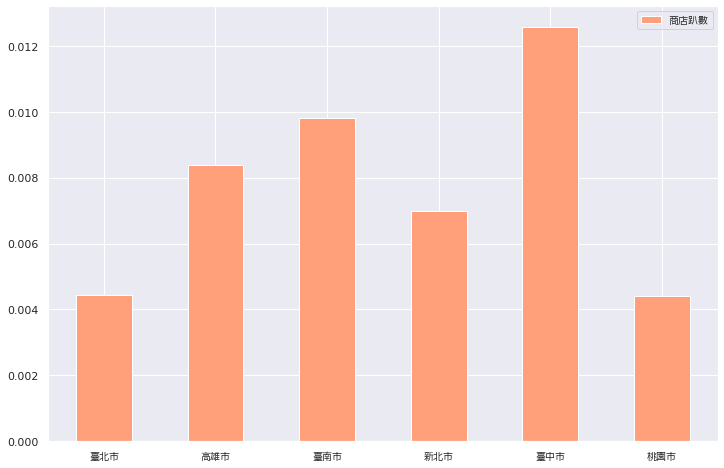

In [ ]:
city_6(city_older,'商店趴數',[4,12,13,14,-4,-2])

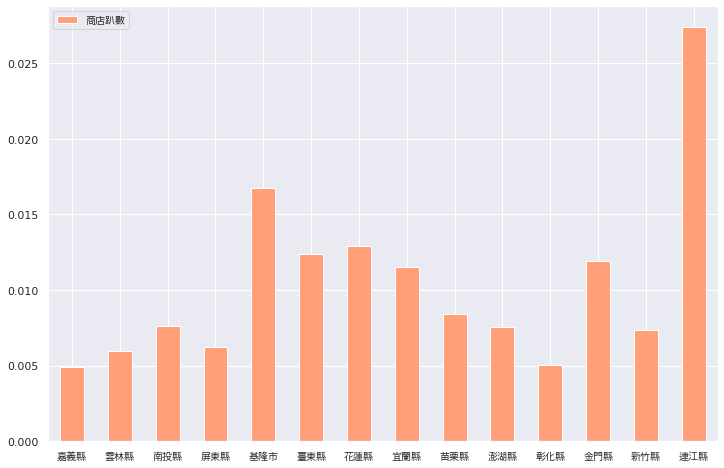

In [ ]:
#非六都
city_6(city_older,'商店趴數',[i for i in range(22) if i not in [4,12,13,14,15,16,18,20]])

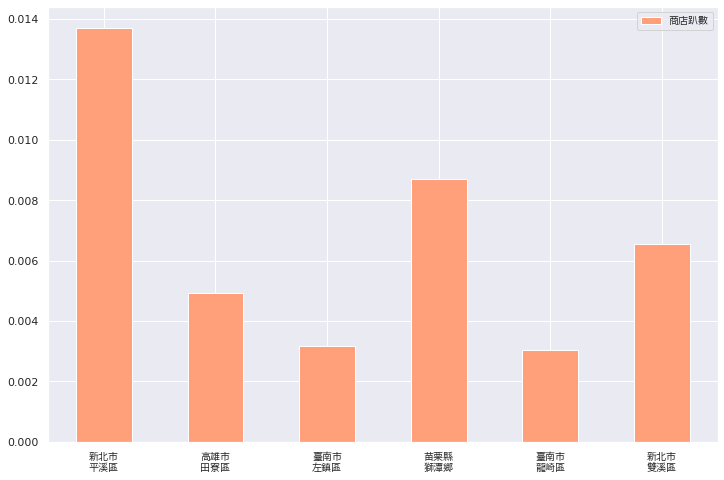

In [ ]:
first_6(town_older,'商店趴數')

## 實價登差異

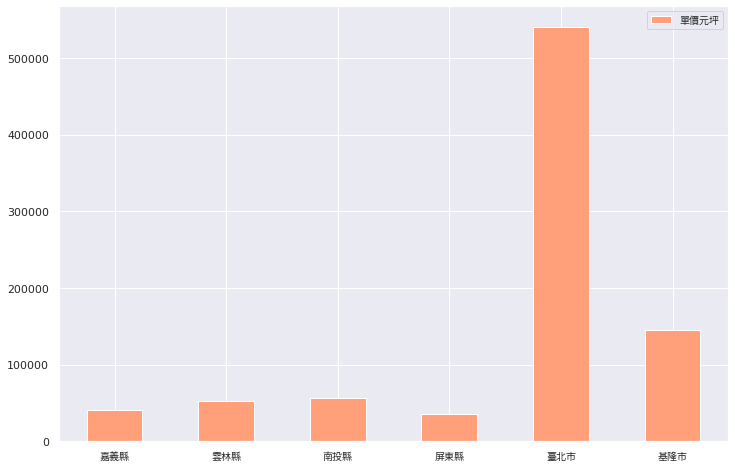

In [ ]:
# X軸 高齡化高到低
# Y軸 單價元坪

first_6(city_older,'單價元坪')

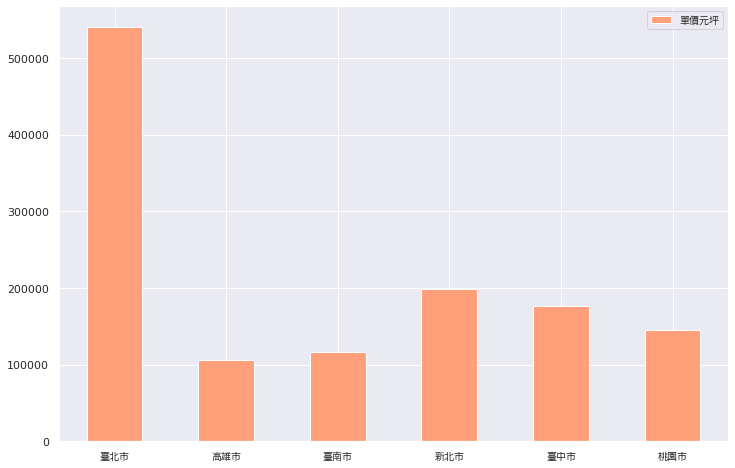

In [ ]:
# X軸 六都高齡化高到低
# Y軸 單價元坪
# 六都位置[2,12,13,15,17,-2]

city_6(city_older,'單價元坪',[4,12,13,14,-4,-2])

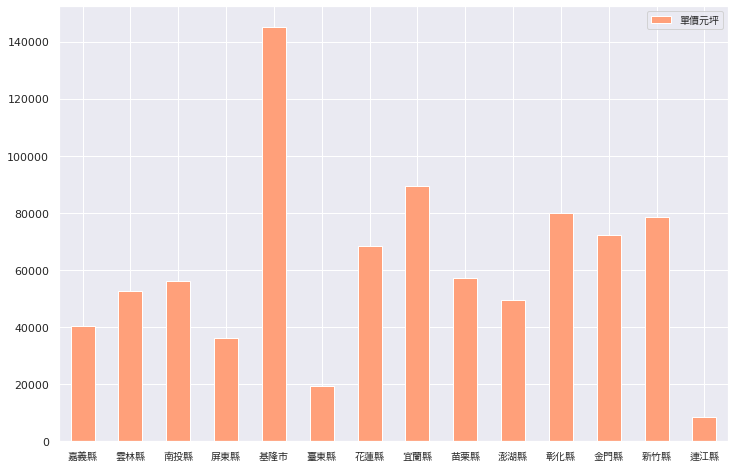

In [ ]:
#非六都
city_6(city_older,'單價元坪',[i for i in range(22) if i not in [4,12,13,14,15,16,18,20]])

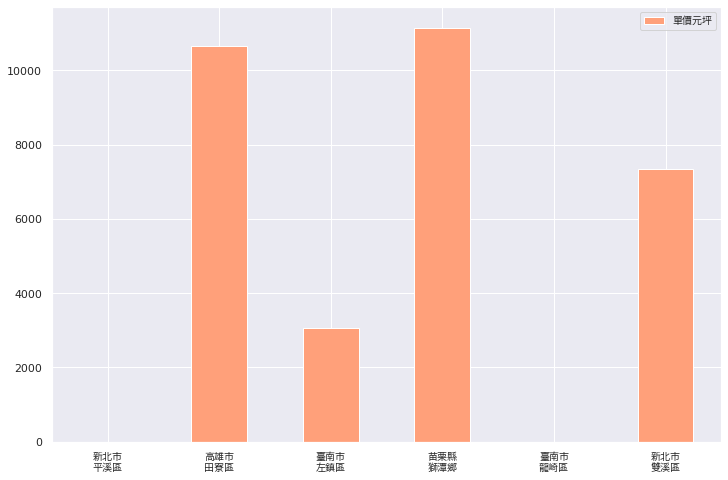

In [ ]:
first_6(town_older,'單價元坪')

## 所得差異

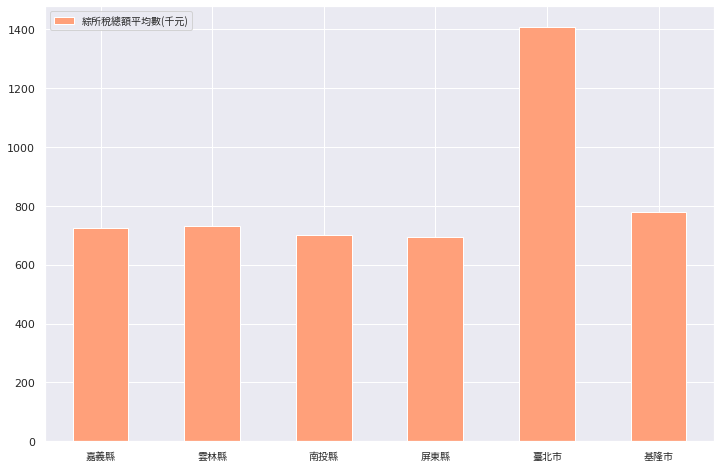

In [ ]:
# X軸 高齡化高到低
# Y軸 綜所稅總額平均數(千元)

first_6(city_older,'綜所稅總額平均數(千元)')

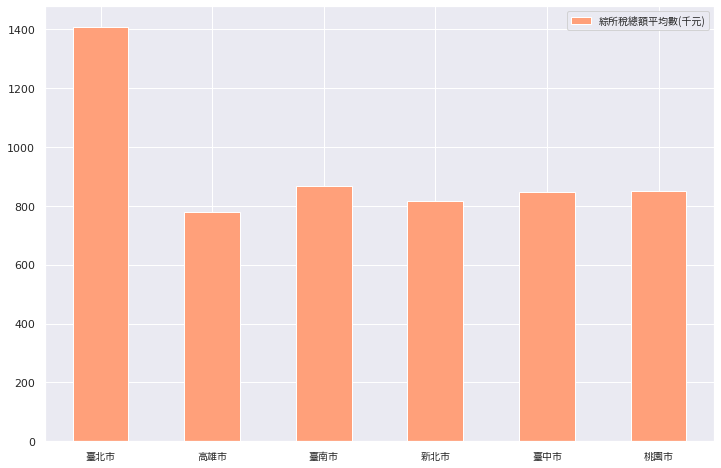

In [ ]:
# X軸 六都高齡化高到低
# Y軸 綜所稅總額平均數(千元)

city_6(city_older,'綜所稅總額平均數(千元)',[4,12,13,14,-4,-2])

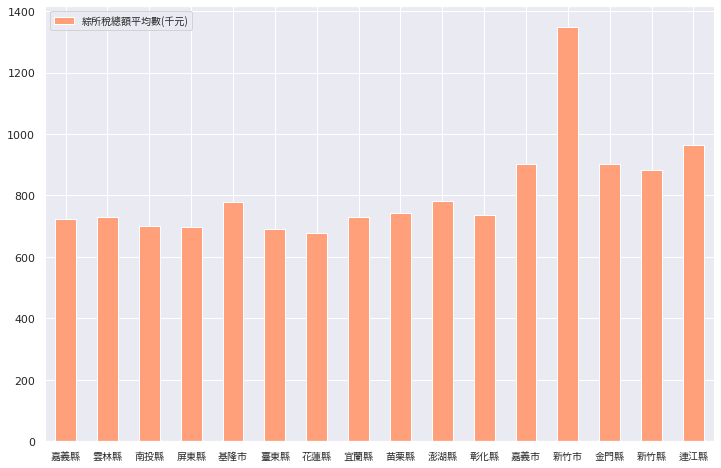

In [ ]:
#非六都
city_6(city_older,'綜所稅總額平均數(千元)',[i for i in range(22) if i not in [4,12,13,14,18,20]])

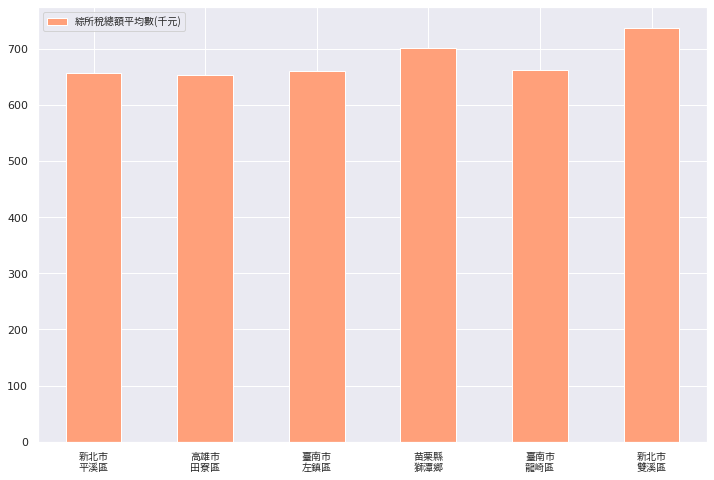

In [ ]:
first_6(town_older,'綜所稅總額平均數(千元)')

# 第二題

In [ ]:
city_D_OLP = data.groupby('COUNTYNAME').mean().sort_values('older_lonely_precent')[::-1]
city_L_OLP = city_D_OLP.index.tolist()
city_OLP = pd.DataFrame(city_D_OLP,city_L_OLP)
city_OLP['商店趴數'] = data.groupby('縣市').sum()['商店總數'] / data.groupby('縣市').sum()['total_city_people']
# city_OLP[['older_lonely_precent','單價元坪','商店趴數']]

In [ ]:
town_D_OLP = data.groupby('city_town').mean().sort_values('T_older_lonely_precent')[::-1]
town_L_OLP = town_D_OLP.index.tolist()
town_OLP = pd.DataFrame(town_D_OLP,town_L_OLP)
town_OLP['商店趴數'] = data.groupby('city_town').sum()['商店總數'] / data.groupby('city_town').sum()['total_city_people']

## 商店


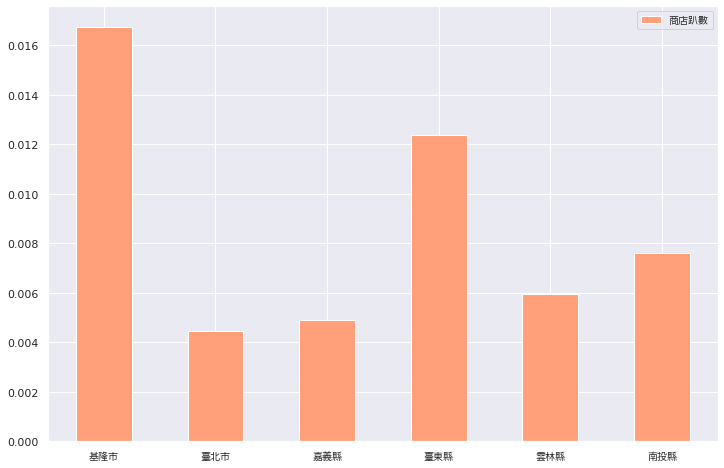

In [ ]:
first_6(city_OLP,'商店趴數')

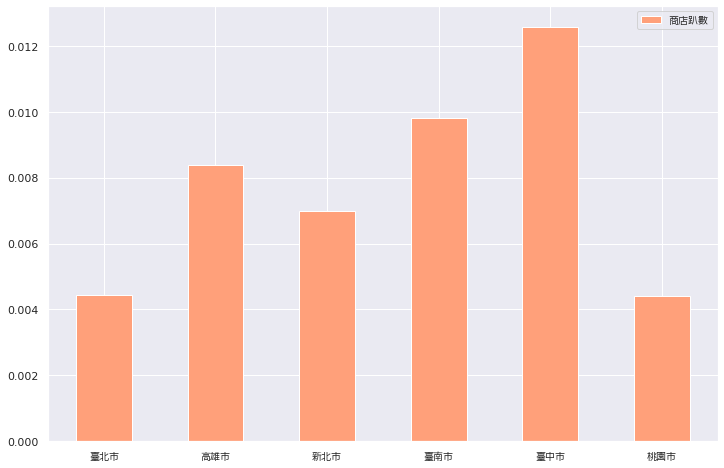

In [ ]:
city_6(city_OLP,'商店趴數',[1,8,10,13,16,18])

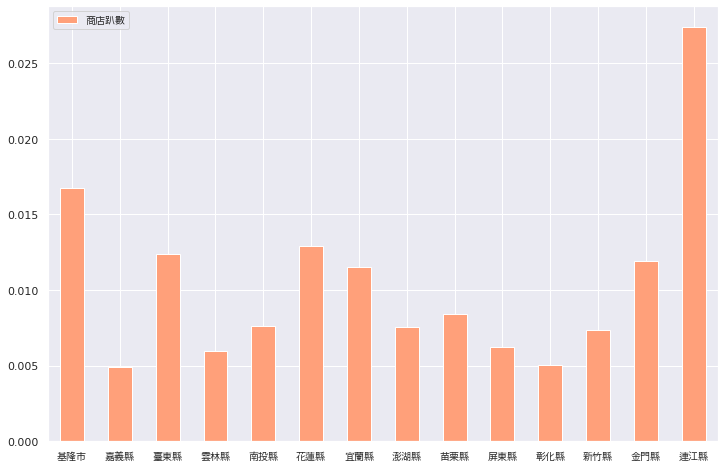

In [ ]:
city_6(city_OLP,'商店趴數',[i for i in range(22) if i not in [1,8,10,13,14,15,16,18]])

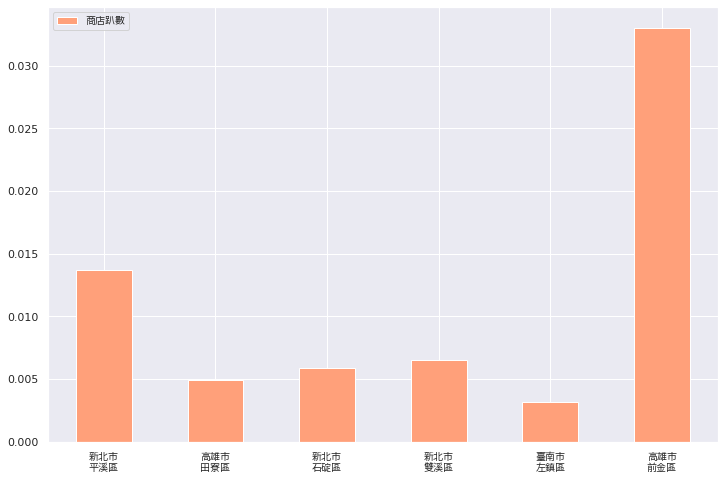

In [ ]:
first_6(town_OLP,'商店趴數')

## 實價登入差異


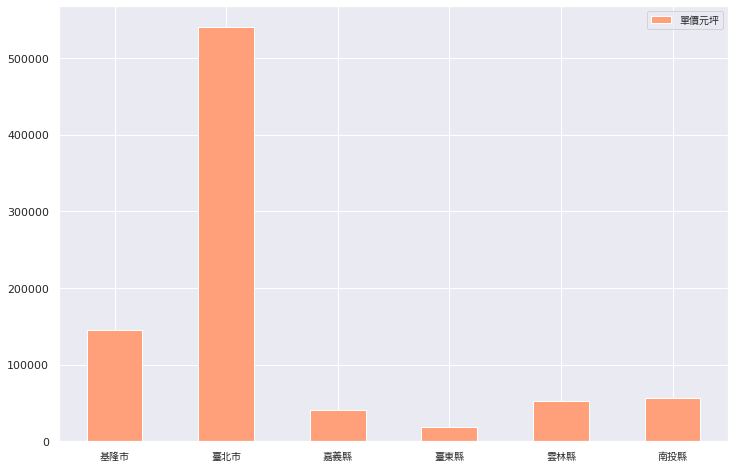

In [ ]:
# X軸 高齡獨居化高到低
# Y軸 單價元坪

first_6(city_OLP,'單價元坪')

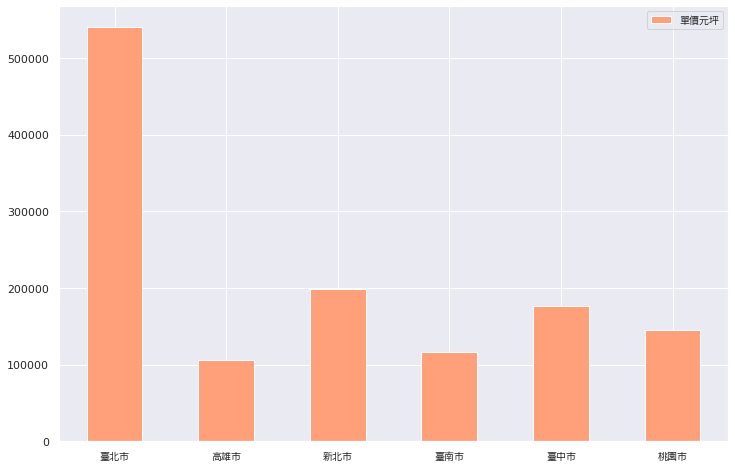

In [ ]:
# X軸 六都高齡獨居化高到低
# Y軸 單價元坪
# 六都位置[0,8,11,12,17,19]

city_6(city_OLP,'單價元坪',[1,8,10,13,16,18])

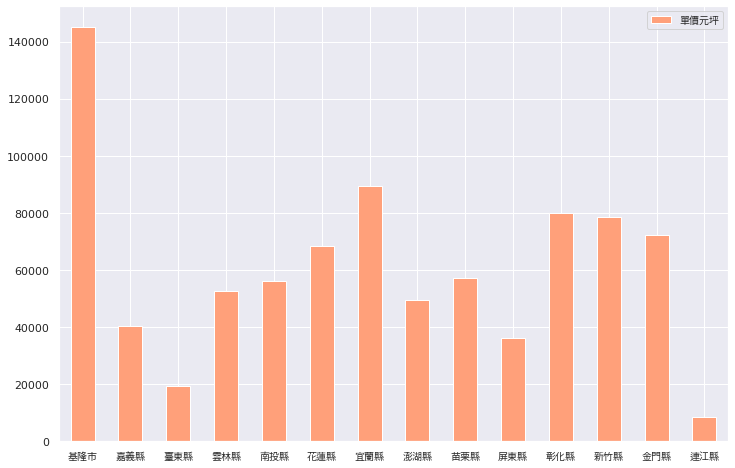

In [ ]:
#非六都
city_6(city_OLP,'單價元坪',[i for i in range(22) if i not in [1,8,10,13,14,15,16,18]])

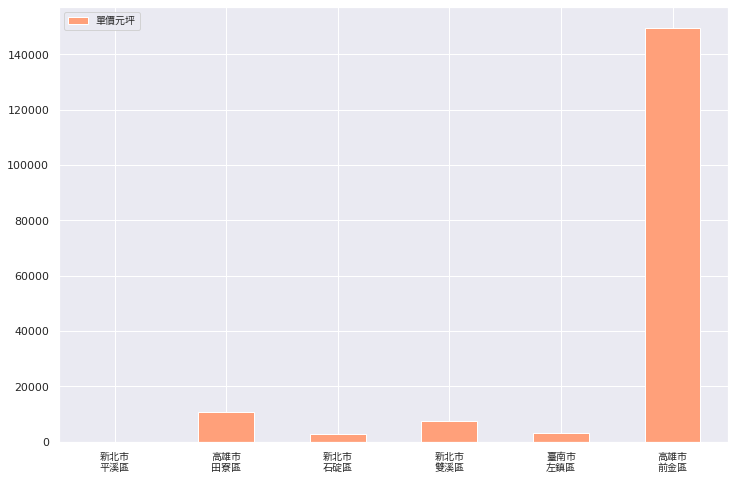

In [ ]:
first_6(town_OLP,'單價元坪')

## 所得差異

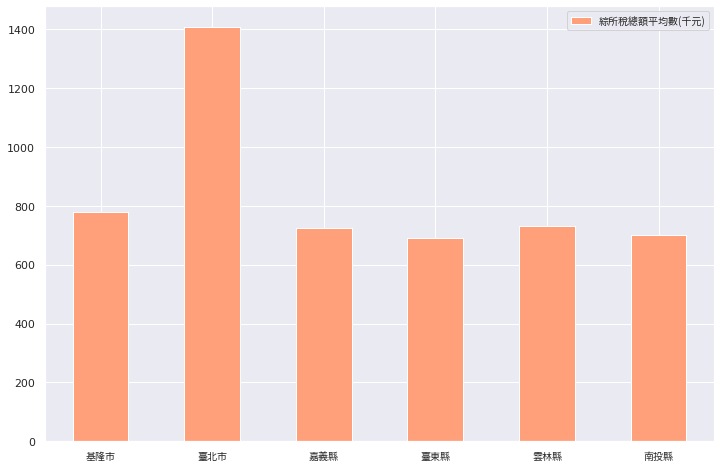

In [ ]:
# X軸 高齡獨居化高到低
# Y軸 綜所稅總額平均數(千元)

first_6(city_OLP,'綜所稅總額平均數(千元)')

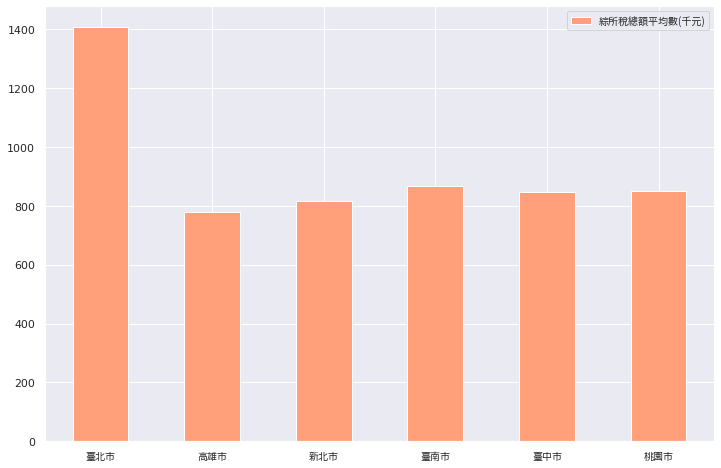

In [ ]:
# X軸 六都高齡獨居化高到低
# Y軸 綜所稅總額平均數(千元)

city_6(city_OLP,'綜所稅總額平均數(千元)',[1,8,10,13,16,18])

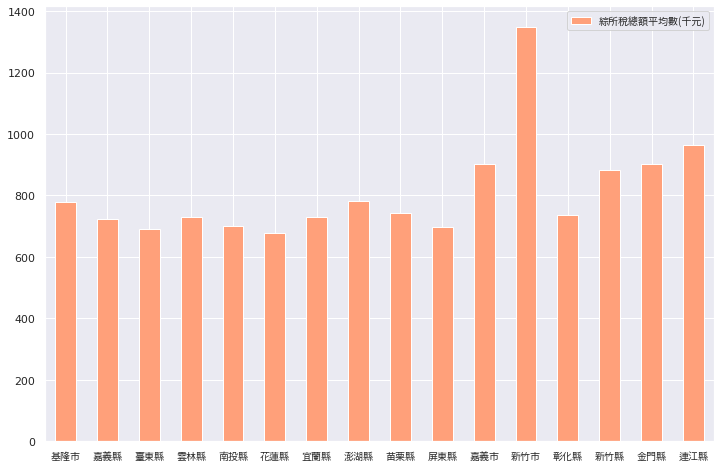

In [ ]:
#非六都
city_6(city_OLP,'綜所稅總額平均數(千元)',[i for i in range(22) if i not in [1,8,10,13,16,18]])

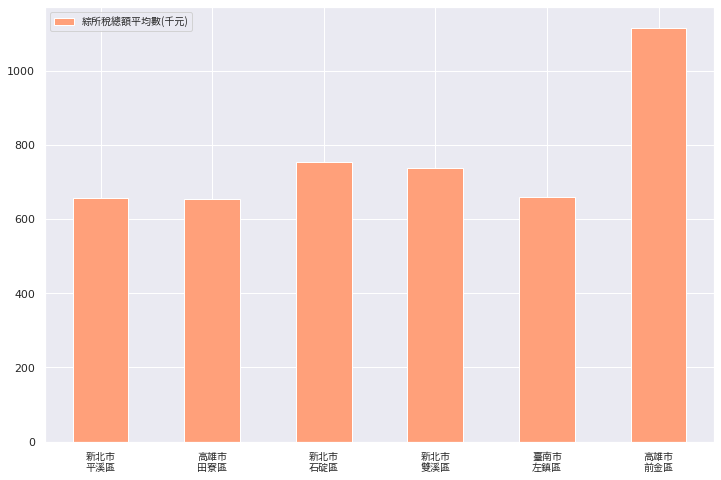

In [ ]:
first_6(town_OLP,'綜所稅總額平均數(千元)')

# 第三題

In [ ]:
from scipy import stats
qu=['診所數量', '金融機構',
       '超商超市市場', '餐飲', '加油站數量', '單價元坪', '綜所稅總額平均數(千元)', 
       '綜所稅總額中位數(千元)', 'Total_atm', '消防隊數量', '工廠數量']
def Pcc(data_name,target_column,columns):
  name=[]
  alist=[]
  pvlist=[]
  for i in range(len(columns)):
    (a,pv)=stats.pearsonr(data_name[target_column],data_name[columns[i]]) 
    name.append(qu[i])
    alist.append(a)
    pvlist.append(pv)
  pd.set_option('display.float_format',lambda x:'%.5f'%x)
  result=pd.DataFrame(alist,name,columns=['相關係數'])
  result.insert(1,'p-value',pvlist) 
  return result

In [ ]:
Pcc(data,'Total_older',qu)

,相關係數,p-value
診所數量,0.68642,0.00000
金融機構,0.57101,0.00000
超商超市市場,0.72938,0.00000
餐飲,0.64229,0.00000
加油站數量,0.52162,0.00000
單價元坪,0.49714,0.00000
綜所稅總額平均數(千元),0.47621,0.00000
綜所稅總額中位數(千元),0.40797,0.00000
Total_atm,0.64158,0.00000
消防隊數量,0.61466,0.00000


In [ ]:
Pcc(data,'total_old_and_lonely',qu)

,相關係數,p-value
診所數量,0.66702,0.00000
金融機構,0.58663,0.00000
超商超市市場,0.70872,0.00000
餐飲,0.61819,0.00000
加油站數量,0.44986,0.00000
單價元坪,0.51565,0.00000
綜所稅總額平均數(千元),0.48000,0.00000
綜所稅總額中位數(千元),0.40517,0.00000
Total_atm,0.63743,0.00000
消防隊數量,0.59556,0.00000


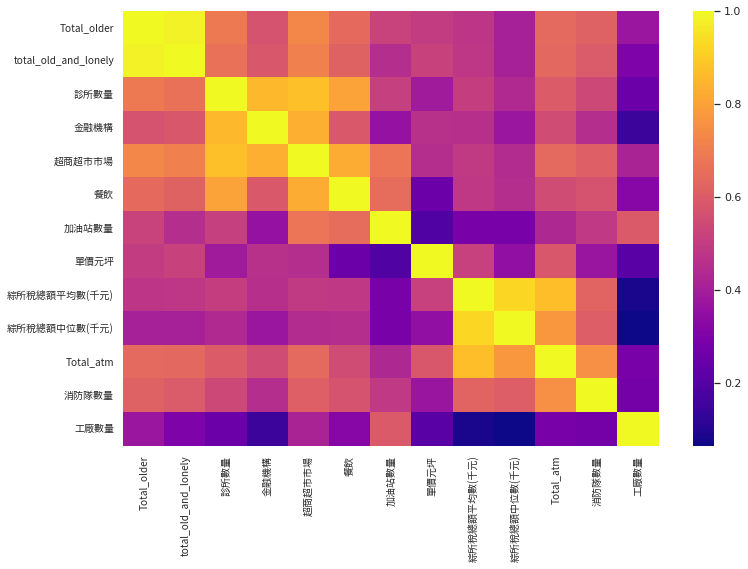

In [ ]:
sns.set(font=myfont.get_name())
pairlist=['Total_older','total_old_and_lonely','診所數量', '金融機構',
       '超商超市市場', '餐飲', '加油站數量', '單價元坪', '綜所稅總額平均數(千元)', 
       '綜所稅總額中位數(千元)', 'Total_atm', '消防隊數量', '工廠數量']
plt.xticks(fontproperties=myfont)
plt.yticks(fontproperties=myfont)
sns.heatmap(data[pairlist].corr(),annot=False,cmap='plasma')